In [3]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")

In [4]:
responses = pd.read_csv("responses.csv").drop(np.array(["Timestamp", "Your name", "Email Address",
                                          "Your preferred name (if different from your name)", 
                                          "Your pronouns", 
                                          "Do you have anything else you would like me to know about you or what you would like from me?"]),
                                axis = 1)


In [5]:
responses.columns = ["Reason Joining Scholars", "Hopes", "Focus", 
                     "Preference: Concept Review", "Preference: Practice Problems",
                     "Preference: Work time",
                     "Preference: Guest Speakers", "Preference: Industry", "Other activities"
                    ]

In [6]:
responses["Other activities"] = responses["Other activities"].fillna("")

In [7]:
responses

,Reason Joining Scholars,Hopes,Focus,Preference: Concept Review,Preference: Practice Problems,Preference: Work time,Preference: Guest Speakers,Preference: Industry,Other activities
0,To learn more about opportunities related in t...,To build connections and do well in data 8,Listening to guest speakers talk about their w...,1,2,3,4,5,
1,Extra practice and gain a deeper understanding...,I hope to improve both in data science but als...,Getting extra help/preparation for Data 8,4,5,1,2,3,
2,To develop a better understanding of Data Scie...,A solid foundation of Data Science that will a...,Listening to guest speakers talk about their w...,1,2,4,3,5,
3,To learn and prepare myself for data science,Learning material even beyond the actual lectu...,Listening to guest speakers talk about their w...,5,1,4,3,2,
4,I wanted to be in a inclusive community that w...,I hope to solidify what I learn in the Data 8 ...,"Getting extra help/preparation for Data 8, Lea...",1,2,3,5,4,
5,I want to learn more about the data science in...,I hope to solidify the concepts I learn in the...,Getting extra help/preparation for Data 8,3,1,2,4,5,No
6,I wanted to sign up for the Data Scholars Prog...,I hope to learn more about data science as a f...,"Getting extra help/preparation for Data 8, Lea...",1,3,4,5,2,"Resume workshops, preparing for summer interns..."
7,To learn more about Data Science and to increa...,I hope to do more practice problems and have a...,Getting extra help/preparation for Data 8,4,5,3,2,1,
8,I don't have much experience with cs or data s...,I hope to have greater command and preparation...,Listening to guest speakers talk about their w...,1,3,5,2,4,
9,Because I'm interested in follow a career rela...,Get more involved with the Data Science world,"Getting extra help/preparation for Data 8, Lea...",1,2,5,4,3,get information related to research in Data Sc...


In [8]:
responses.describe()

,Preference: Concept Review,Preference: Practice Problems,Preference: Work time,Preference: Guest Speakers,Preference: Industry
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.458333,2.791667,3.375000,3.208333,3.166667
std,1.693444,1.382473,1.013496,1.413573,1.434563
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,3.000000,2.000000,2.000000
50%,1.500000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.250000,4.250000
max,5.000000,5.000000,5.000000,5.000000,5.000000


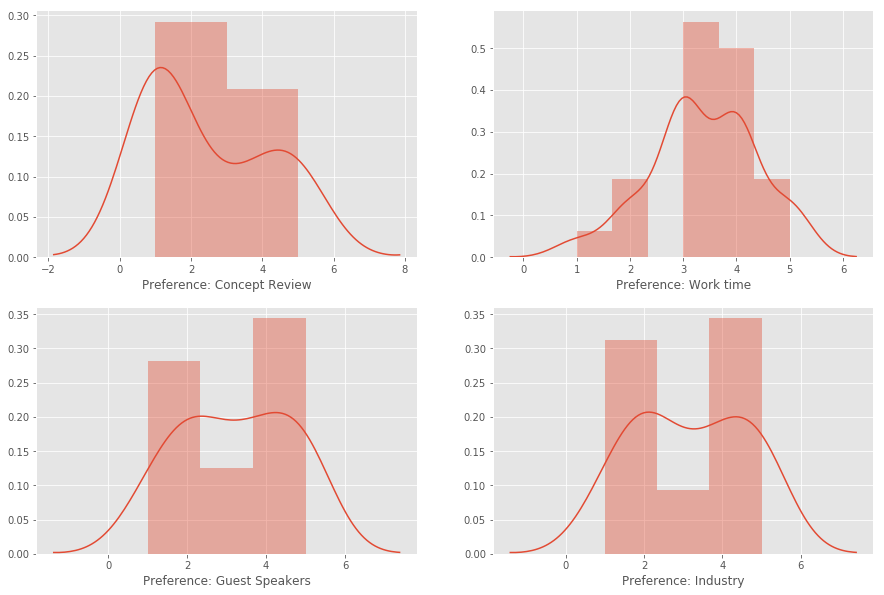

In [9]:
concept_review = responses["Preference: Concept Review"]
work_time = responses["Preference: Work time"]
guests = responses["Preference: Guest Speakers"]
tools = responses["Preference: Industry"]
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

sns.distplot(concept_review,ax = ax1);
sns.distplot(work_time,ax = ax2);
sns.distplot(guests,ax = ax3);
sns.distplot(tools,ax = ax4);

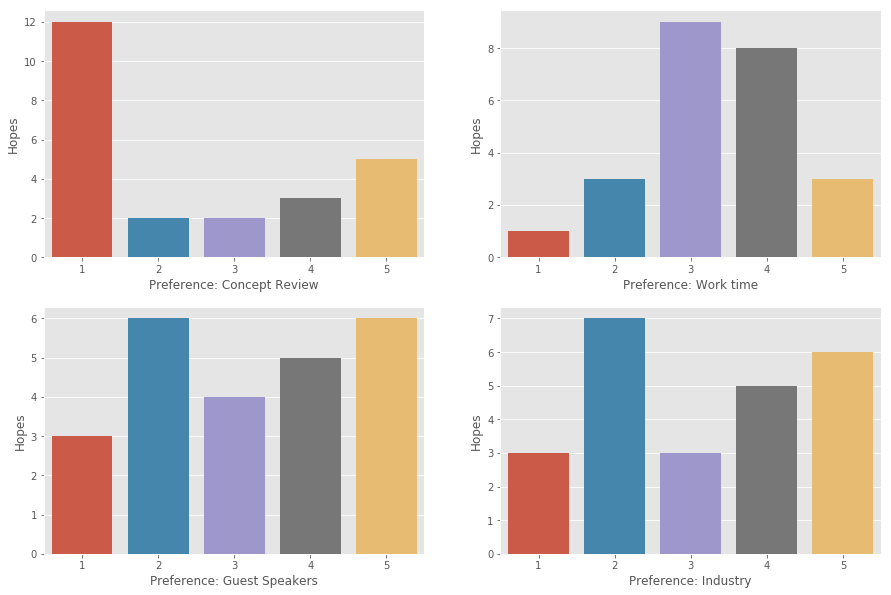

In [10]:
concept_count = responses.groupby("Preference: Concept Review").count()
work_count = responses.groupby("Preference: Work time").count()
guests_count = responses.groupby("Preference: Guest Speakers").count()
tools_count = responses.groupby("Preference: Industry").count()
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

sns.barplot(x = concept_count.index, y = concept_count["Hopes"], ax = ax1);
sns.barplot(work_count.index, y = work_count["Hopes"], ax = ax2);
sns.barplot(guests_count.index, y = guests_count["Hopes"], ax = ax3);
sns.barplot(tools_count.index, y = tools_count["Hopes"], ax = ax4);



In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
encoder = MultiLabelBinarizer()

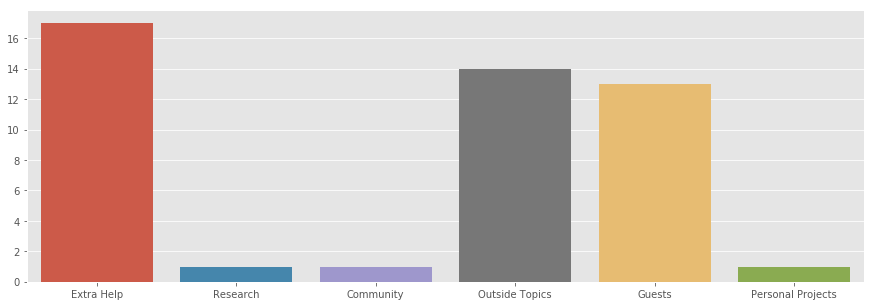

In [12]:
by_cat = responses["Focus"].str.split(",")
by_cat = by_cat.apply(lambda x: [i.strip() for i in x])
encoded = encoder.fit_transform(by_cat)
list(encoder.classes_)
focus_table = pd.DataFrame(columns =list(encoder.classes_), data = encoded)
focus_table.columns = ["Extra Help", "Research", "Community", "Outside Topics", "Guests", "Personal Projects"]
focus_totals = focus_table.sum()

plt.figure(figsize = (15, 5))
sns.barplot(x = focus_totals.index, y = focus_totals);


In [13]:
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")
# stemmer.stem("having")
# for i in text_columns:
#     text_columns[i] = text_columns[i].apply(lambda x: [stemmer.stem(j) for j in x])

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
s = "This is a simple sentence"
tokens = word_tokenize(s)

In [16]:
text_columns = responses[["Reason Joining Scholars", "Hopes", "Other activities"]]
# for i in text_columns:
#     text_columns[i] = text_columns[i].apply(word_tokenize)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tvec_reasons = TfidfVectorizer(min_df=0.0, max_df=7, stop_words='english', ngram_range= (1, 3))

tvec_reasons_weights = tvec_reasons.fit_transform(text_columns["Reason Joining Scholars"].str.lower())

reasons_weights = np.asarray(tvec_reasons_weights.mean(axis=0)).ravel().tolist()
reasons_weights_df = pd.DataFrame({'term': tvec_reasons.get_feature_names(), 'weight': reasons_weights})
reasons_weights_sorted = reasons_weights_df.sort_values(by = 'weight', ascending = False)





In [43]:
reasons_weights_sorted.head(20)

,term,weight
227,learn data,0.048787
228,learn data science,0.048787
454,yes,0.041667
434,wanted,0.040285
417,understanding,0.034522
104,experience,0.030624
122,field,0.029840
45,community,0.028857
163,help,0.025795
428,want,0.025663


In [40]:
tvec_hopes = TfidfVectorizer(min_df=0.0, max_df=5, stop_words='english', ngram_range= (1, 2))

tvec_hopes_weights = tvec_hopes.fit_transform(text_columns["Hopes"].str.lower())

hopes_weights = np.asarray(tvec_hopes_weights.mean(axis=0)).ravel().tolist()
hopes_weights_df = pd.DataFrame({'term': tvec_hopes.get_feature_names(), 'weight': hopes_weights})
hopes_weights_sorted = hopes_weights_df.sort_values(by = 'weight', ascending = False)

hopes_weights_sorted.head(20)

#adjust weights


,term,weight
245,science field,0.046387
89,field,0.046387
292,understanding,0.042929
304,want,0.034449
15,better,0.033118
126,hope learn,0.030454
314,world,0.029766
17,better understanding,0.029678
294,understanding data,0.027500
196,new,0.026433


In [41]:
tvec_other = TfidfVectorizer(min_df=0.0, max_df=100.0, stop_words='english', ngram_range= (1, 2))

tvec_other_weights = tvec_other.fit_transform(text_columns["Other activities"].str.lower())

other_weights = np.asarray(tvec_other_weights.mean(axis=0)).ravel().tolist()
other_weights_df = pd.DataFrame({'term': tvec_other.get_feature_names(), 'weight': other_weights})
other_weights_sorted = other_weights_df.sort_values(by = 'weight', ascending = False)

other_weights_sorted.head(20)

#adjust weights



,term,weight
44,really,0.041667
55,science,0.028503
11,data,0.028503
12,data science,0.028503
35,opportunities,0.025361
48,research,0.025361
68,workshops,0.024969
52,resume workshops,0.024969
51,resume,0.024969
33,maybe,0.019813


In [23]:
def words_in_texts(words, texts):
    indicator_array = 1 * np.array([texts.str.contains(i) for i in words]).T
    
    return indicator_array

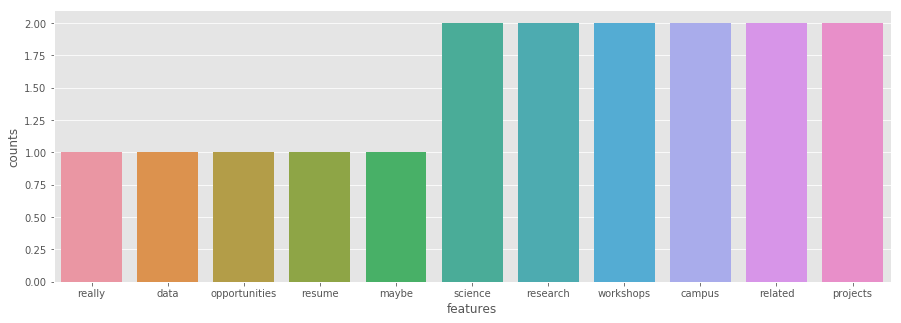

In [30]:
#ngrams changed so that word length is 1, does not exactly correspond to above weights
other_top10 = other_weights_sorted.iloc[0:11]["term"]
other_top10_features = other_top10
other_top10_df = pd.DataFrame()
other_top10_df["features"] = other_top10_features
other_top10_counts = np.count_nonzero(words_in_texts(other_top10, text_columns["Other activities"]), axis = 0)
other_top10_df["counts"] = other_top10_counts
other_top10_df = other_top10_df.sort_values(by = "counts")
plt.figure(figsize = (15, 5))
sns.barplot(x = other_top10_df["features"], y = other_top10_df["counts"]);

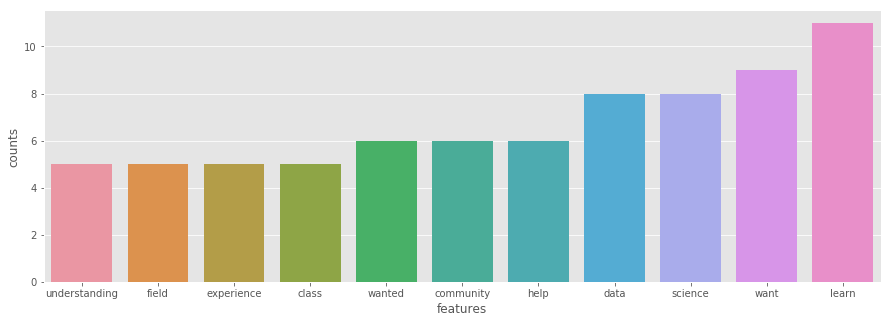

In [31]:
#ngrams changed so that word length is 1, does not exactly correspond to above weights
reasons_top10 = reasons_weights_sorted.iloc[0:11]["term"]
reasons_top10_features = reasons_top10
reasons_top10_df = pd.DataFrame()
reasons_top10_df["features"] = reasons_top10_features
reasons_top10_counts = np.count_nonzero(words_in_texts(reasons_top10, text_columns["Reason Joining Scholars"]), axis = 0)
reasons_top10_df["counts"] = reasons_top10_counts
reasons_top10_df = reasons_top10_df.sort_values(by = "counts")
plt.figure(figsize = (15, 5))
sns.barplot(x = reasons_top10_df["features"], y = reasons_top10_df["counts"]);

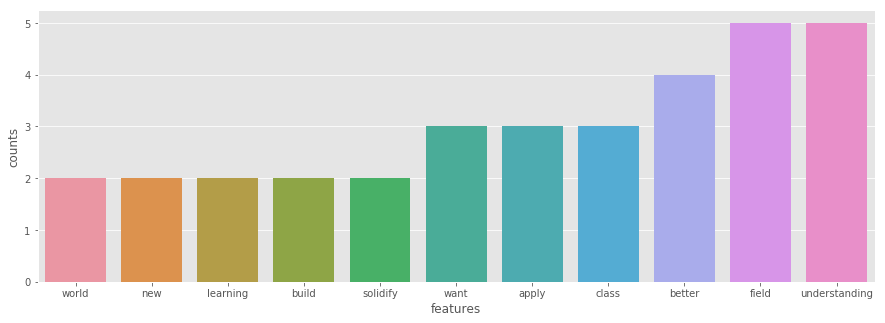

In [34]:
#ngrams changed so that word length is 1, does not exactly correspond to above weights
hopes_top10 = hopes_weights_sorted.iloc[0:11]["term"]
hopes_top10_features = hopes_top10
hopes_top10_df = pd.DataFrame()
hopes_top10_df["features"] = hopes_top10_features
hopes_top10_counts = np.count_nonzero(words_in_texts(hopes_top10, text_columns["Hopes"]), axis = 0)
hopes_top10_df["counts"] = hopes_top10_counts
hopes_top10_df = hopes_top10_df.sort_values(by = "counts")
plt.figure(figsize = (15, 5))
sns.barplot(x = hopes_top10_df["features"], y = hopes_top10_df["counts"]);